# Task II - Estimating Service Metrics from Device Statistics

The objective of this task is to estimate the frame rate of a VoD service from the device statistics of a VoD server. Our approach is to gather observations from the system and apply linear regression on this data to estimate the service metric Y from device statistics X. For this task, we use the trace with 3600 observations described above.

Your task is to compute (i.e., to train) a linear model M that accurately maps device statistics onto service metrics.

You train and test your model M with the so-called validation-set technique. This technique entails that you split the set of observations into two parts: the training set for computing the model M and the test set for evaluating the accuracy of M. From the complete set of observations, you select uniformly at random 70% of the observations (i.e., 2520 observations) to form the training set and then assign the remaining 30% i.e., 1080 observations) to the test set.

## Evaluate the Accuracy of Service Metric Estimation

### (a) Model Training - use linear regression to train a model M with the training set. Provide the coefficients (Θ0, ..., Θ9) of your model M. (Θ0 is the offset.)

In [67]:
import math
import pandas
import numpy
import matplotlib
import pylab
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics

In [8]:
# import dataset_x and dataset_y
data_set_x = pandas.read_csv('X.csv')
data_set_y = pandas.read_csv('Y.csv')

# join operations similar to relational databases on field 'TimeStamp'
data_set = pandas.merge(data_set_x, data_set_y, on='TimeStamp')

In [9]:
(data_set_train, data_set_test) = sklearn.model_selection.train_test_split(data_set, test_size=0.3)

In [58]:
linear_regressor = sklearn.linear_model.LinearRegression()
x = data_set_train.iloc[:, 1:-1] # all lines, all columns except the the fisrt and last
y = data_set_train.iloc[:, -1] # all lines and only last column
linear_regressor.fit(x, y)
print('The coefficients of our model M is', linear_regressor.coef_)

The coefficients of our model M is [-8.17045807e-02 -7.81440309e-02 -8.20763193e-03 -8.19761549e-05
 -4.10569212e-03  3.03424556e-05 -5.97474650e-02 -6.34721877e-02
 -1.64029345e-05]


###  (b) Accuracy of Model M - compute the estimation error of M over the test set. We define the estimation error as the Normalized Mean Absolute Error (NMAE). 

In [62]:
x = data_set_test.iloc[:, 1:-1] # all lines, all columns except the the fisrt and last
y = data_set_test.iloc[:, -1] # all lines and only last column
y_estimation = linear_regressor.predict(x)
average_observations = data_set_test.iloc[:, -1].mean(axis=0)
mean_absolute_error = sklearn.metrics.mean_absolute_error(y, y_estimation)
normalized_mean_absolute_error = mean_absolute_error * ( 1 / average_observations ) 
print('The estimation error (Normalized Mean Absolute Error - NMAE) is', normalized_mean_absolute_error)

The estimation error (Normalized Mean Absolute Error - NMAE) is 0.1031993390295046


### (Cont.) As a baseline for M, use a naive method which relies on Y values only. For each x ∈ X it predicts a constant value y which is the sample mean of the samples yi in the training set. Compute y for the naive method for the training set and compute the NMAE for the test set.

In [63]:
x = data_set_test.iloc[:, 1:-1] # all lines, all columns except the the fisrt and last
y = data_set_test.iloc[:, -1] # all lines and only last column
average_observations = data_set_train.iloc[:, -1].mean(axis=0)
y_estimation = pandas.DataFrame( [average_observations] * data_set_test.shape[0] ) ## [average, average, ..., average]
mean_absolute_error = sklearn.metrics.mean_absolute_error(y, y_estimation)
normalized_mean_absolute_error = mean_absolute_error * ( 1 / average_observations ) 
print('The estimation error using naive method is', normalized_mean_absolute_error)

The estimation error using naive method is 0.25933694532156487


### (c) Produce a time series plot that shows both the measurements and the model estimations for M for the Video Frame Rate values in the test set. Show also the prediction of the a naıve method.

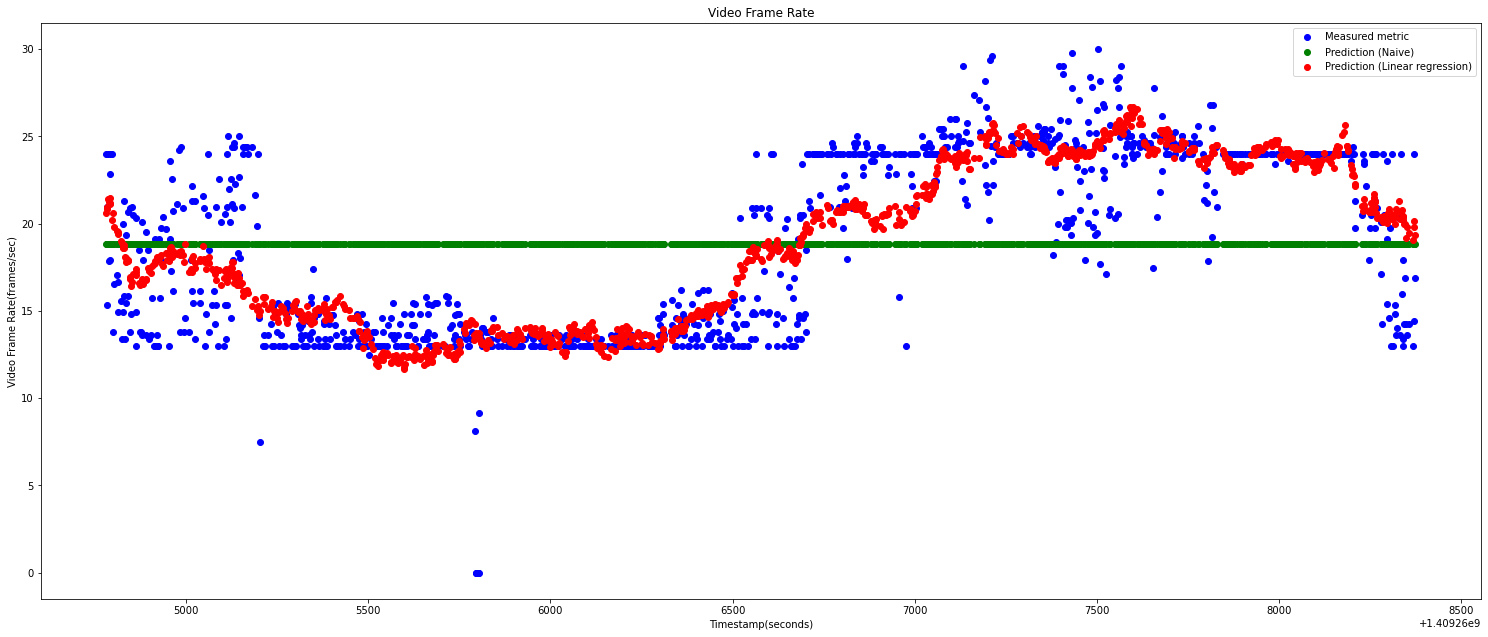

In [64]:
timestamp = data_set_test.iloc[:, 0]
x = data_set_test.iloc[:, 1:-1] # all lines, all columns except the the first and last
y = data_set_test.iloc[:, -1] # all lines and only last column
y_estimation = linear_regressor.predict(x)
average_observations = data_set_train.iloc[:, -1].mean(axis=0)
y_naive = [average_observations] * data_set_test.shape[0]

figure=matplotlib.pyplot.figure(figsize=(20, 8))
ax=figure.add_axes([0,0,1,1])
ax.scatter(timestamp, y, color='blue', label='Measured metric')
ax.scatter(timestamp, y_naive, color='green', label='Prediction (Naive)')
ax.scatter(timestamp, y_estimation, color='red', label='Prediction (Linear regression)')
ax.set_xlabel('Timestamp(seconds)')
ax.set_ylabel('Video Frame Rate(frames/sec)')
ax.set_title('Video Frame Rate')
ax.legend()
matplotlib.pyplot.show()


### (d) Produce a density plot and a histogram for the Video Frame Rate values in the test set. Set the bin size of the histogram to 1 frame.

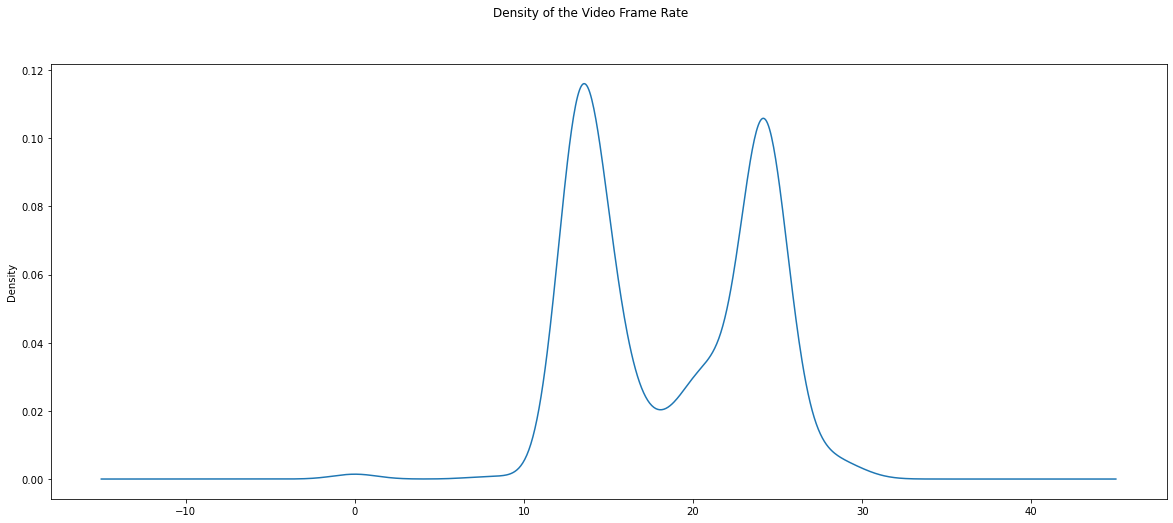

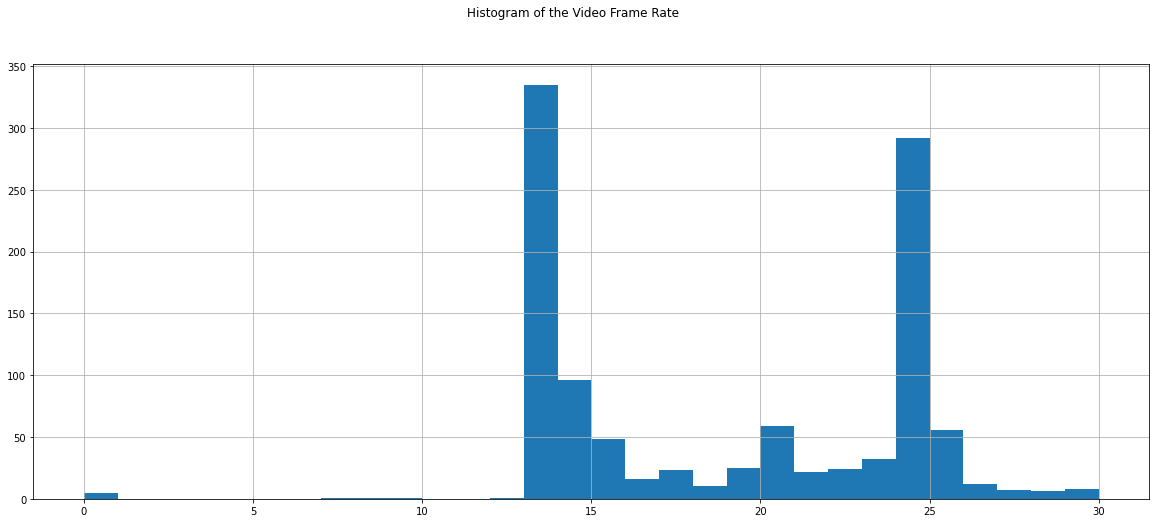

In [70]:
data_frame = data_set_test.iloc[:, -1] # all lines and only last column

data_frame.plot.density(figsize=(20, 8))
pylab.suptitle('Density of the Video Frame Rate')
matplotlib.pyplot.show()

bins = math.ceil(data_frame.max() -  data_frame.min())
data_frame.hist(figsize=(20, 8), bins=bins)
pylab.suptitle('Histogram of the Video Frame Rate')
matplotlib.pyplot.show()

### (e) Produce a density plot for the prediction errors in the test set

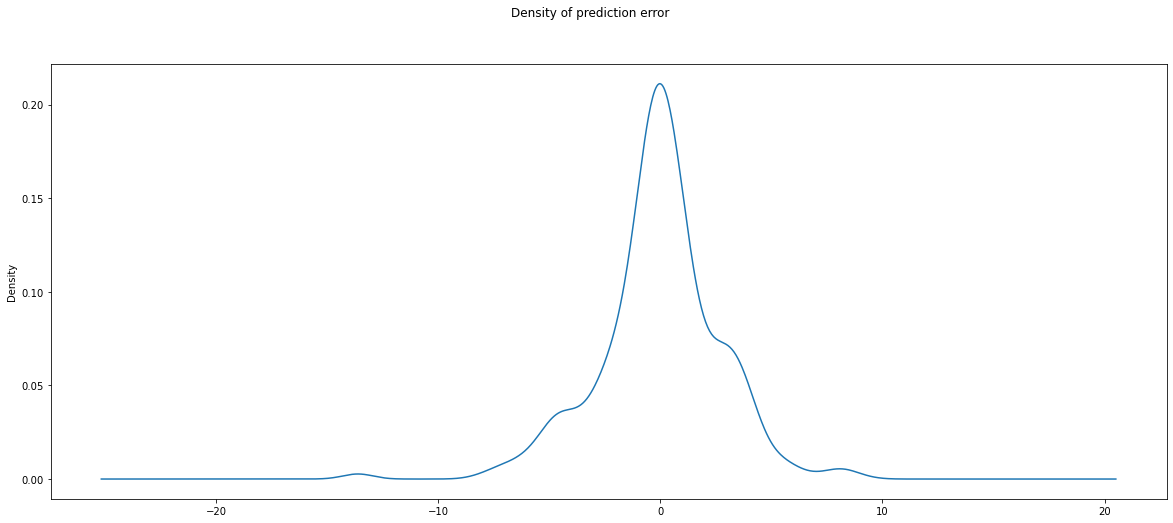

In [71]:
x = data_set_test.iloc[:, 1:-1] # all lines, all columns except the the fisrt and last
y = data_set_test.iloc[:, -1] # all lines and only last column
y_estimation = linear_regressor.predict(x)
prediction_error = y - y_estimation
prediction_error.plot.density(figsize=(20, 8))
pylab.suptitle('Density of prediction error')
matplotlib.pyplot.show()

### (f) Based on the above ﬁgures and graphs, discuss the accuracy of estimating the Video Frame Rate

## Study the Relationship between Estimation Accuracy and the Size of the Training Set

### (a)  From the above training set with 2520 observations, create six training sets by selecting uniformly at random 50, 100, 200, 500, 1000, and 2520 observations (which is the original set).

In [72]:
data_set_train_50 = data_set_train.sample(n = 50)
data_set_train_100 = data_set_train.sample(n = 100)
data_set_train_200 = data_set_train.sample(n = 200)
data_set_train_500 = data_set_train.sample(n = 500)
data_set_train_1000 = data_set_train.sample(n = 1000)
data_set_train_2520 = data_set_train.sample(n = 2520)

### (b) Train a linear model and compute the NMAE for each model for the original test set with 1080 observations.

In [73]:
x_1080 = data_set_test.iloc[:, 1:-1] # all lines, all columns except the the fisrt and last
y_1080 = data_set_test.iloc[:, -1] # all lines and only last column
average_observations = data_set_test.iloc[:, -1].mean(axis=0)

In [40]:
linear_regressor_50 = sklearn.linear_model.LinearRegression()
x_50 = data_set_train_50.iloc[:, 1:-1] # all lines, all columns except the the fisrt and last
y_50 = data_set_train_50.iloc[:, -1] # all lines and only last column
linear_regressor_50.fit(x_50, y_50)
y_estimation = linear_regressor_50.predict(x_1080)
mean_absolute_error = sklearn.metrics.mean_absolute_error(y_1080, y_estimation)
normalized_mean_absolute_error_50 = mean_absolute_error * ( 1 / average_observations )
print('The estimation error (Normalized Mean Absolute Error - NMAE) for 50 random observation is', normalized_mean_absolute_error_50)

The estimation error (Normalized Mean Absolute Error - NMAE) for 50 random observation is 0.12008502866362672


In [21]:
linear_regressor_100 = sklearn.linear_model.LinearRegression()
x_100 = data_set_train_100.iloc[:, 1:-1] # all lines, all columns except the last
y_100 = data_set_train_100.iloc[:, -1] # all lines and only last column
linear_regressor_100.fit(x_100, y_100)
y_estimation = linear_regressor_100.predict(x_1080)
mean_absolute_error = sklearn.metrics.mean_absolute_error(y_1080, y_estimation)
normalized_mean_absolute_error_100 = mean_absolute_error * ( 1 / average_observations )
print('The estimation error (Normalized Mean Absolute Error - NMAE) for 100 random observation is', normalized_mean_absolute_error_100)

The estimation error (Normalized Mean Absolute Error - NMAE) for 100 random observation is 0.11284020736206192


In [74]:
linear_regressor_200 = sklearn.linear_model.LinearRegression()
x_200 = data_set_train_200.iloc[:, 1:-1] # all lines, all columns except the the fisrt and last
y_200 = data_set_train_200.iloc[:, -1] # all lines and only last column
linear_regressor_200.fit(x_200, y_200)
y_estimation = linear_regressor_200.predict(x_1080)
mean_absolute_error = sklearn.metrics.mean_absolute_error(y_1080, y_estimation)
normalized_mean_absolute_error_200 = mean_absolute_error * ( 1 / average_observations )
print('The estimation error (Normalized Mean Absolute Error - NMAE) for 200 random observation is', normalized_mean_absolute_error_200)

The estimation error (Normalized Mean Absolute Error - NMAE) for 200 random observation is 0.1091010765126555


In [75]:
linear_regressor_500 = sklearn.linear_model.LinearRegression()
x_500 = data_set_train_500.iloc[:, 1:-1] # all lines, all columns except the the fisrt and last
y_500 = data_set_train_500.iloc[:, -1] # all lines and only last column
linear_regressor_500.fit(x_500, y_500)
y_estimation = linear_regressor_500.predict(x_1080)
mean_absolute_error = sklearn.metrics.mean_absolute_error(y_1080, y_estimation)
normalized_mean_absolute_error_500 = mean_absolute_error * ( 1 / average_observations )
print('The estimation error (Normalized Mean Absolute Error - NMAE) for 500 random observation is', normalized_mean_absolute_error_500)

The estimation error (Normalized Mean Absolute Error - NMAE) for 500 random observation is 0.10423913858569582


In [76]:
linear_regressor_1000 = sklearn.linear_model.LinearRegression()
x_1000 = data_set_train_1000.iloc[:, 1:-1] # all lines, all columns except the the fisrt and last
y_1000 = data_set_train_1000.iloc[:, -1] # all lines and only last column
linear_regressor_1000.fit(x_1000, y_1000)
y_estimation = linear_regressor_1000.predict(x_1080)
mean_absolute_error = sklearn.metrics.mean_absolute_error(y_1080, y_estimation)
normalized_mean_absolute_error_1000 = mean_absolute_error * ( 1 / average_observations )
print('The estimation error (Normalized Mean Absolute Error - NMAE) for 1000 random observation is', normalized_mean_absolute_error_1000)


The estimation error (Normalized Mean Absolute Error - NMAE) for 1000 random observation is 0.10511041624386304


In [77]:
linear_regressor_2520 = sklearn.linear_model.LinearRegression()
x_2520 = data_set_train_2520.iloc[:, 1:-1] # all lines, all columns except the the fisrt and last
y_2520 = data_set_train_2520.iloc[:, -1] # all lines and only last column
linear_regressor_2520.fit(x_2520, y_2520)
y_estimation = linear_regressor_2520.predict(x_1080)
mean_absolute_error = sklearn.metrics.mean_absolute_error(y_1080, y_estimation)
normalized_mean_absolute_error_2520 = mean_absolute_error * ( 1 / average_observations )
print('The estimation error (Normalized Mean Absolute Error - NMAE) for 2520 random observation is', normalized_mean_absolute_error_2520)

The estimation error (Normalized Mean Absolute Error - NMAE) for 2520 random observation is 0.10319933902950607


| Traning set size | Normalized Mean Absolute Error - NMAE |
| --- | --- |
| 50 | 0.12008502866362672 |
| 100 | 0.11284020736206192 |
| 200 | 0.1091010765126555 |
| 500 | 0.10423913858569582 |
| 1000 | 0.10511041624386304 |
| 2520 | 0.10319933902950607 |

### (c) Perform the above 50 times, so you train models for 50 diﬀerent subsets of a given size.

In [78]:
linear_regressors_50 = []
for i in range(50):
    data_set_train_50 = data_set_train.sample(n = 50)
    linear_regressor_50 = sklearn.linear_model.LinearRegression()
    x_50 = data_set_train_50.iloc[:, 1:-1] # all lines, all columns except the the fisrt and last
    y_50 = data_set_train_50.iloc[:, -1] # all lines and only last column
    linear_regressor_50.fit(x_50, y_50)
    linear_regressors_50.append(linear_regressor_50)

In [79]:
linear_regressors_100 = []
for i in range(50):
    data_set_train_100 = data_set_train.sample(n = 100)
    linear_regressor_100 = sklearn.linear_model.LinearRegression()
    x_100 = data_set_train_100.iloc[:, 1:-1] # all lines, all columns except the the fisrt and last
    y_100 = data_set_train_100.iloc[:, -1] # all lines and only last column
    linear_regressor_100.fit(x_100, y_100)
    linear_regressors_100.append(linear_regressor_100)

In [80]:
linear_regressors_200 = []
for i in range(50):
    data_set_train_200 = data_set_train.sample(n = 200)
    linear_regressor_200 = sklearn.linear_model.LinearRegression()
    x_200 = data_set_train_200.iloc[:, 1:-1] # all lines, all columns except the the fisrt and last
    y_200 = data_set_train_200.iloc[:, -1] # all lines and only last column
    linear_regressor_200.fit(x_200, y_200)
    linear_regressors_200.append(linear_regressor_200)

In [81]:
linear_regressors_500 = []
for i in range(50):
    data_set_train_500 = data_set_train.sample(n = 500)
    linear_regressor_500 = sklearn.linear_model.LinearRegression()
    x_500 = data_set_train_500.iloc[:, 1:-1] # all lines, all columns except the the fisrt and last
    y_500 = data_set_train_500.iloc[:, -1] # all lines and only last column
    linear_regressor_500.fit(x_500, y_500)
    linear_regressors_500.append(linear_regressor_500)

In [82]:
linear_regressors_1000 = []
for i in range(50):
    data_set_train_1000 = data_set_train.sample(n = 1000)
    linear_regressor_1000 = sklearn.linear_model.LinearRegression()
    x_1000 = data_set_train_1000.iloc[:, 1:-1] # all lines, all columns except the the fisrt and last
    y_1000 = data_set_train_1000.iloc[:, -1] # all lines and only last column
    linear_regressor_1000.fit(x_1000, y_1000)
    linear_regressors_1000.append(linear_regressor_1000)

In [83]:
linear_regressors_2520 = []
for i in range(50):
    data_set_train_2520 = data_set_train.sample(n = 2520)
    linear_regressor_2520 = sklearn.linear_model.LinearRegression()
    x_2520 = data_set_train_2520.iloc[:, 1:-1] # all lines, all columns except the the fisrt and last
    y_2520 = data_set_train_2520.iloc[:, -1] # all lines and only last column
    linear_regressor_2520.fit(x_2520, y_2520)
    linear_regressors_2520.append(linear_regressor_2520)

### (d)  Produce a plot that shows NMAE for M against the size of the training set. Use error bars or box plots to show the range of the NMAE values for a given set size.

In [84]:
x_1080 = data_set_test.iloc[:, 1:-1] # all lines, all columns except the the fisrt and last
y_1080 = data_set_test.iloc[:, -1] # all lines and only last column
average_observations = data_set_test.iloc[:, -1].mean(axis=0)

In [85]:
normalized_mean_absolute_error_50 = []
for linear_regressor in linear_regressors_50:
    y_estimation = linear_regressor.predict(x_1080)
    mean_absolute_error = sklearn.metrics.mean_absolute_error(y_1080, y_estimation)
    normalized_mean_absolute_error = mean_absolute_error * ( 1 / average_observations )
    normalized_mean_absolute_error_50.append(normalized_mean_absolute_error)

In [86]:
normalized_mean_absolute_error_100 = []
for linear_regressor in linear_regressors_100:
    y_estimation = linear_regressor.predict(x_1080)
    mean_absolute_error = sklearn.metrics.mean_absolute_error(y_1080, y_estimation)
    normalized_mean_absolute_error = mean_absolute_error * ( 1 / average_observations )
    normalized_mean_absolute_error_100.append(normalized_mean_absolute_error)

In [87]:
normalized_mean_absolute_error_200 = []
for linear_regressor in linear_regressors_200:
    y_estimation = linear_regressor.predict(x_1080)
    mean_absolute_error = sklearn.metrics.mean_absolute_error(y_1080, y_estimation)
    normalized_mean_absolute_error = mean_absolute_error * ( 1 / average_observations )
    normalized_mean_absolute_error_200.append(normalized_mean_absolute_error)

In [88]:
normalized_mean_absolute_error_500 = []
for linear_regressor in linear_regressors_500:
    y_estimation = linear_regressor.predict(x_1080)
    mean_absolute_error = sklearn.metrics.mean_absolute_error(y_1080, y_estimation)
    normalized_mean_absolute_error = mean_absolute_error * ( 1 / average_observations )
    normalized_mean_absolute_error_500.append(normalized_mean_absolute_error)

In [89]:
normalized_mean_absolute_error_1000 = []
for linear_regressor in linear_regressors_1000:
    y_estimation = linear_regressor.predict(x_1080)
    mean_absolute_error = sklearn.metrics.mean_absolute_error(y_1080, y_estimation)
    normalized_mean_absolute_error = mean_absolute_error * ( 1 / average_observations )
    normalized_mean_absolute_error_1000.append(normalized_mean_absolute_error)

In [90]:
normalized_mean_absolute_error_2520 = []
for linear_regressor in linear_regressors_2520:
    y_estimation = linear_regressor.predict(x_1080)
    mean_absolute_error = sklearn.metrics.mean_absolute_error(y_1080, y_estimation)
    normalized_mean_absolute_error = mean_absolute_error * ( 1 / average_observations )
    normalized_mean_absolute_error_2520.append(normalized_mean_absolute_error)


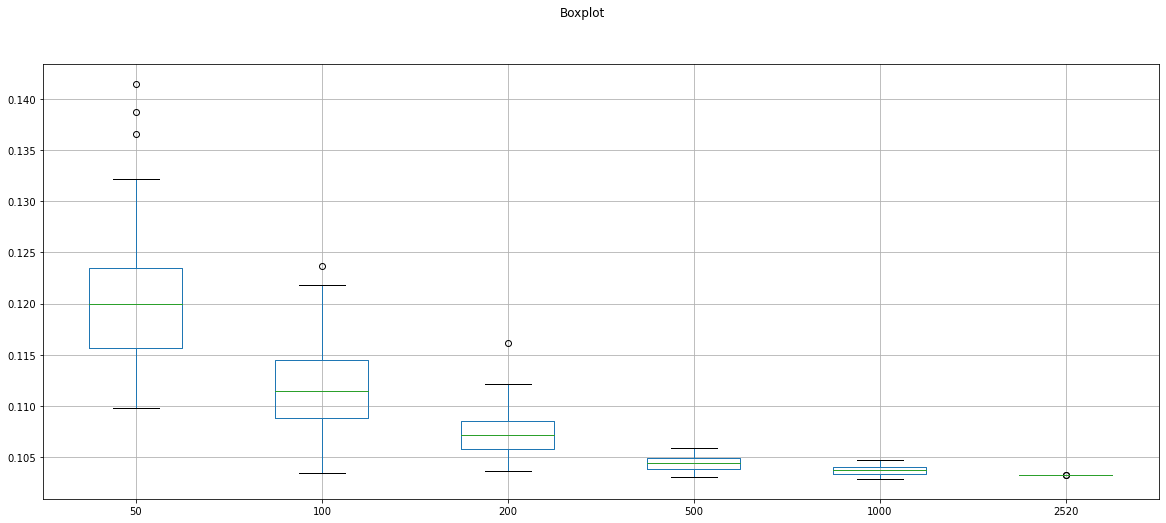

In [91]:
data_frame = pandas.DataFrame({
    '50': normalized_mean_absolute_error_50,
    '100': normalized_mean_absolute_error_100,
    '200': normalized_mean_absolute_error_200,
    '500': normalized_mean_absolute_error_500,
    '1000': normalized_mean_absolute_error_1000,
    '2520': normalized_mean_absolute_error_2520,
})
data_frame.boxplot(figsize=(20, 8))
pylab.suptitle('Boxplot')
matplotlib.pyplot.show()

### (e)  Based on the above, discuss the relationship between the accuracy of the model estimations and the training set.